In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import statistics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import os
import seaborn as sns


In [2]:
os.getcwd()

'C:\\Users\\yumun\\Downloads'

In [3]:
df = pd.read_csv('train_transaction.csv')
df.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train_id = pd.read_csv('train_identity.csv')
df_train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
df_train_id.shape


(144233, 41)

In [6]:
df.shape

(590540, 394)

In [7]:
#combine train, using the transaction IDs as the reference point
df_com_train = pd.merge(df, df_train_id, on = 'TransactionID', how='left')

In [8]:
#check the shape of the combined train data
df_com_train.shape

(590540, 434)

In [9]:
#looks good, the rows+colums seem to be in good order

In [10]:
#now to check the total number of fraudulent and normal cases
fraud = df_com_train.loc[df_com_train['isFraud'] == 1]
non_fraud = df_com_train.loc[df_com_train["isFraud"] == 0]
print(len(fraud))
print(len(non_fraud))

20663
569877


In [11]:
# percentage of fraudulent transactions calculated
len(fraud)/len(non_fraud)*100

3.625870143908247

In [12]:
# now replacing all NaN with zeroes 
df_com_train = df.fillna(0)

In [13]:
# double checking to see if the percentage of fraudulent transactions changed
len(fraud)/len(non_fraud)*100

3.625870143908247

In [14]:
# show non-numeric, categorical variables
df_com_train[df_com_train.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,0,0,T,T,T,M2,F,T,0,0,0
1,W,mastercard,credit,gmail.com,0,0,0,0,M0,T,T,0,0,0
2,W,visa,debit,outlook.com,0,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,0,0,0,0,M0,T,F,0,0,0
4,H,mastercard,credit,gmail.com,0,0,0,0,0,0,0,0,0,0
5,W,visa,debit,gmail.com,0,T,T,T,M1,F,T,0,0,0
6,W,visa,debit,yahoo.com,0,T,T,T,M0,F,F,T,T,T
7,W,visa,debit,mail.com,0,0,0,0,M0,F,F,0,0,0
8,H,visa,debit,anonymous.com,0,0,0,0,0,0,0,0,0,0
9,W,mastercard,debit,yahoo.com,0,T,T,T,M0,T,T,0,0,0


In [15]:
# One by one, replacing all the categorical columns with new columns that represent the categories in each column, 
# and representing them by zeroes and ones.
card6_dummy_df=pd.get_dummies(df_com_train["card6"])

In [16]:
df_com_train=pd.concat([df_com_train,card6_dummy_df],axis=1)

In [17]:
ProductCD_dummy_df=pd.get_dummies(df_com_train["ProductCD"])
df_com_train=pd.concat([df_com_train,ProductCD_dummy_df],axis=1)

In [18]:
card4_dummy_df=pd.get_dummies(df_com_train["card4"])
df_com_train=pd.concat([df_com_train,card4_dummy_df],axis=1)

In [19]:
P_emaildomain_dummy_df=pd.get_dummies(df_com_train["P_emaildomain"])
df_com_train=pd.concat([df_com_train,P_emaildomain_dummy_df],axis=1)

In [20]:
R_emaildomain_dummy_df=pd.get_dummies(df_com_train["R_emaildomain"])
df_com_train=pd.concat([df_com_train,R_emaildomain_dummy_df],axis=1)

In [21]:
M1_dummy_df=pd.get_dummies(df_com_train["M1"])
df_com_train=pd.concat([df_com_train,M1_dummy_df],axis=1)

In [22]:
M2_dummy_df=pd.get_dummies(df_com_train["M2"])
df_com_train=pd.concat([df_com_train,M2_dummy_df],axis=1)

In [23]:
M3_dummy_df=pd.get_dummies(df_com_train["M3"])
df_com_train=pd.concat([df_com_train,M3_dummy_df],axis=1)

In [24]:
M4_dummy_df=pd.get_dummies(df_com_train["M4"])
df_com_train=pd.concat([df_com_train,M4_dummy_df],axis=1)

In [25]:
M5_dummy_df=pd.get_dummies(df_com_train["M5"])
df_com_train=pd.concat([df_com_train,M5_dummy_df],axis=1)

In [26]:
M6_dummy_df=pd.get_dummies(df_com_train["M6"])
df_com_train=pd.concat([df_com_train,M6_dummy_df],axis=1)

In [27]:
M7_dummy_df=pd.get_dummies(df_com_train["M7"])
df_com_train=pd.concat([df_com_train,M7_dummy_df],axis=1)

In [28]:
M8_dummy_df=pd.get_dummies(df_com_train["M8"])
df_com_train=pd.concat([df_com_train,M8_dummy_df],axis=1)

In [29]:
M9_dummy_df=pd.get_dummies(df_com_train["M9"])
df_com_train=pd.concat([df_com_train,M9_dummy_df],axis=1)

In [30]:
df_com_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,T,0,F,T,0,F,T,0,F,T
0,2987000,0,86400,68.5,W,13926,0.0,150.0,discover,142.0,...,1,1,0,0,1,0,0,1,0,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,1,1,0,0,1,0,0,1,0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0,0,1,0,0,1,0,0,1,0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,0,1,0,0,1,0,0,1,0,0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0,1,0,0,1,0,0,1,0,0


In [31]:
#now dropping all categorical columsn as they are already transferred to numerical columsn
df_com_train=df_com_train._get_numeric_data()
df_com_train=df_com_train.dropna()

In [32]:
#double check if the data significantly affected by the data preparation above
len(df_com_train[df_com_train["isFraud"]==1])/len(df_com_train)*100

3.4990009144173126

In [33]:
#now separating the "isFraud" column from main data
x_full_df=df_com_train.drop(["isFraud"],axis=1)
y_full_df=df_com_train["isFraud"]

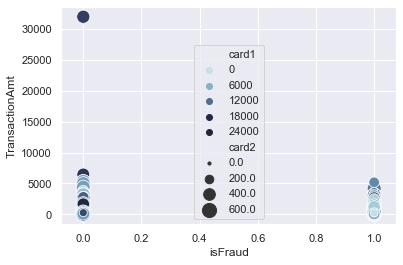

In [34]:
sns.set()

complete_data = df_com_train

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="isFraud", y="TransactionAmt",
                     hue="card1", size="card2",
                     palette=cmap, sizes=(10, 200),
                     data=complete_data)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.85)

In [36]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [37]:
# Starting logistic regression
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

C:\Users\yumun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Prediction percentage
lr.score(X_test, y_test)

0.964521006695766

In [39]:
y_pred=lr.predict(X_test)

In [40]:
# check which predictions on are true including false positives
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,484112,248,484360
1,17561,38,17599
All,501673,286,501959


In [41]:
recall_score(y_test, y_pred)

0.0021592135916813455

In [42]:
accuracy_score(y_test, y_pred)

0.964521006695766